In [864]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25,10)

In [865]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
from sklearn.cross_validation import train_test_split
import subprocess
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randint
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [954]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8') 

In [955]:
df_train = df_train.drop(['_id'], axis=1)
df_test = df_test.drop(['_id'], axis=1)

In [350]:
c = np.unique(df_train['education'], return_counts=True)
c

(array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object), array([2523, 1399, 3565, 5737,    7, 3112, 7309, 1060]))

In [351]:
np.unique(df_test['education'], return_counts=True)

(array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object), array([1653,  893, 2480, 3778,   11, 2131, 4859,  671]))

In [352]:
# education = df_train.pivot_table('target', ['education'], aggfunc='count')
# education
education_df = df.pivot_table('target', ['education'], aggfunc='mean')
education_df

,target
education,
basic.4y,0.104637
basic.6y,0.080057
basic.9y,0.079102
high.school,0.105804
illiterate,0.000000
professional.course,0.110219
university.degree,0.141880
unknown,0.133962


In [674]:
poutcome = df_train.pivot_table('target', ['poutcome'], aggfunc='mean')
poutcome

,target
poutcome,
failure,0.139127
nonexistent,0.089056
success,0.661250


In [353]:
marital = df_train.pivot_table('target', ['marital'], aggfunc='mean')
marital

,target
marital,
divorced,0.105626
married,0.101338
single,0.139611
unknown,0.133333


In [354]:
job = df_train.pivot_table('target', ['job'], aggfunc='mean')
job

,target
job,
admin.,0.131916
blue-collar,0.071873
entrepreneur,0.085580
housemaid,0.098160
management,0.115472
retired,0.239760
self-employed,0.102353
services,0.079046
student,0.301444


In [355]:
df_train['contact']

0         cellular
1        telephone
2         cellular
3        telephone
4        telephone
5        telephone
6         cellular
7         cellular
8         cellular
9         cellular
10       telephone
11       telephone
12       telephone
13       telephone
14        cellular
15        cellular
16        cellular
17       telephone
18       telephone
19       telephone
20        cellular
21       telephone
22        cellular
23       telephone
24        cellular
25       telephone
26       telephone
27        cellular
28        cellular
29        cellular
           ...    
24682    telephone
24683    telephone
24684    telephone
24685     cellular
24686    telephone
24687    telephone
24688     cellular
24689     cellular
24690     cellular
24691     cellular
24692    telephone
24693     cellular
24694     cellular
24695     cellular
24696     cellular
24697     cellular
24698    telephone
24699    telephone
24700    telephone
24701    telephone
24702     cellular
24703     ce

In [1159]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop([
        'day_of_week',
        'month',
        'euribor3m',  
        'loan',
        'default', 
#         'poutcome',
        'education',
        'marital',
        'job',
        'contact',
        'housing'
    ], axis=1)    
    
#     df_output['housing'] = df_output['housing'].replace({'no': 0, 'yes': 1, 'unknown': -1})
    df_output['poutcome'] = df_output['poutcome'].replace({'failure': 0, 'success': 1, 'nonexistent': -1})
#     df_output.loc[:, ['default', 'housing', 'loan']] = \
#     df_output.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'yes': 1, 'unknown': -1})

#     # средний таргет по каждому признаку
#     df_output['education'] = df_output['education'].replace({
#         'basic.4y': 0.104637,
#         'basic.6y': 0.080057,
#         'basic.9y': 0.079102,
#         'high.school': 0.105804,
#         'illiterate': 0.000000,
#         'professional.course': 0.110219,
#         'university.degree': 0.141880,
#         'unknown': 0.133962
#     }) 
    
#     df_output['marital'] = df_output['marital'].replace({
#         'divorced' : 0.105626,
#         'married' : 0.101338,
#         'single' : 0.139611,
#         'unknown' : 0.133333
#     })
    
#     df_output['job'] = df_output['job'].replace({
#         'admin.': 0.131916,
#         'blue-collar': 0.071873,
#         'entrepreneur': 0.085580,
#         'housemaid': 0.098160,
#         'management': 0.115472,
#         'retired': 0.239760,
#         'self-employed': 0.102353,
#         'services': 0.079046,
#         'student': 0.301444,
#         'technician': 0.107600,
#         'unemployed': 0.144781,
#         'unknown': 0.101523
#     })  
#     df_output['contact'] = df_output['contact'].replace({'telephone': 0, 'cellular': 1})
#     df_output = pd.get_dummies(df_output, dummy_na = True,  columns=['marital'])
    
    return df_output

In [1160]:
df_preproc = df_train.pipe(preproc_data)

X = df_preproc.drop(['target'], axis=1)
y = df_preproc['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1
)

In [1161]:
dtc = DecisionTreeClassifier()

dtc_param = {
    'criterion': ['gini', 'entropy'], # мера неопределености
    'max_depth': range(3, 100), # максимальная глубина от 3х до 5 равномерное
    'min_samples_leaf': range(2, 20), # минимальное кол-во объектов в решине дерева, 
    # достаточное для дробления на части
    'class_weight': [None, 'balanced']} # вес классов (взвешиваем пустые значения)

dtc_grid = RandomizedSearchCV(
    dtc, 
    param_distributions=dtc_param, # распредление параметров, заданных в словаре
    n_iter=400, # 400 переборов
    n_jobs=-1, # чтобы всё считалось в несколько потоков
    cv=5, 
    scoring='roc_auc'
)

dtc_grid.fit(X_train, y_train)
dtc_grid.best_params_, dtc_grid.best_score_, dtc_grid.best_estimator_

# dtc = DecisionTreeClassifier(
#     class_weight = 'balanced',
#     criterion = 'entropy',
#     max_depth = 6,
#     min_samples_leaf = 8
# )
# dtc.fit(X_train, y_train)


({'min_samples_leaf': 17,
  'max_depth': 6,
  'criterion': 'entropy',
  'class_weight': 'balanced'},
 0.9318721563713213,
 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
             max_depth=6, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=17, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

In [1162]:
dtc = dtc_grid.best_estimator_
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test, )
roc_auc_score(y_test, dtc_predict_proba[:, 1])

# min_samples_leaf = 9 roc auc 0.9258184123669315
# min_samples_leaf = 2 roc auc 0.9257686773166468
# удалим euribor3m из-за кореляции 0.9258822284840846 
# если удалим nr.employed из-за той же кореляции, то 0.920...
# если добавить и перекатегоризировать месяцы, то 0.9230600577359848
# с невыкинутыми или выкинутыми'loan' и 'default' 0.9247170202007347 (рекол 0.84)
# с применением дамми-кодиирования к 'marital'      

# если поставить гиперпараметры дерева в gini и min_samples_leaf = 9 (но рекол падает в 0.79), зато 
# roc auc 0.9258822284840846
# бест модель: 0.9260226342044524

# c nr.employed 0.9329471480365978, без 0.9322729857405302

# Лучший результат 0.9325603378726465

# 0.933053282576503 с невырезанным хаусингом

0.943805660805078

In [1163]:
print(classification_report(y_test, dtc_predict))

             precision    recall  f1-score   support

          0       0.99      0.84      0.91      2190
          1       0.42      0.92      0.58       282

avg / total       0.92      0.85      0.87      2472



In [1089]:
imp = dtc.feature_importances_
pd.Series(index=X.columns, data=imp).sort_values()

campaign          0.000518
poutcome          0.000864
previous          0.002238
pdays             0.006377
age               0.008808
cons.price.idx    0.011565
emp.var.rate      0.043048
cons.conf.idx     0.093339
nr.employed       0.291320
duration          0.541923
dtype: float64

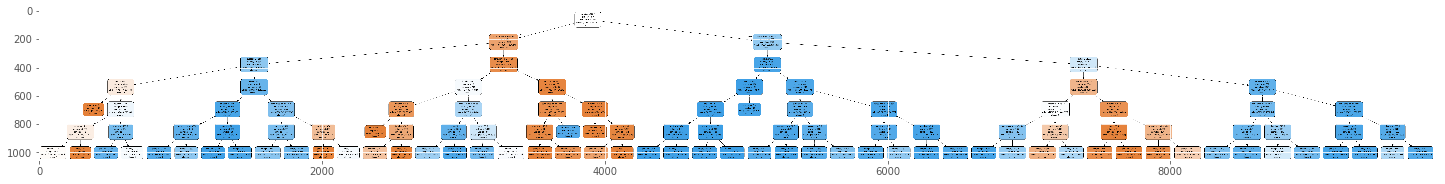

In [1172]:
idx = df_preproc.columns != 'target'
feature_names = df_preproc.columns[idx]

with open('tree.dot', 'w') as fout:
    export_graphviz(
        dtc, 
        out_file=fout, 
        feature_names=feature_names, 
        class_names=['0', '1'], 
        filled=True, 
        rounded=True,  
        special_characters=True
    )
command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
subprocess.check_call(command)
plt.imshow(plt.imread('tree.png'))

In [1164]:
def optimize(random_seed, n_iter, cv):

    model = DecisionTreeClassifier(random_state=random_seed)
#     model_params = {
#         'min_samples_leaf': range(2, 100),
#         'min_samples_split': range(10, 700),
#         'max_depth': range(3, 100),
#         'criterion': ['gini', 'entropy']
#     }
    
    model_params = {
        'min_samples_leaf': range(30, 1000),
        'min_samples_split': range(10, 1000),
        'max_depth': range(1, 100),
        'criterion': ['entropy', 'gini']
    }
       
    model_optimized = RandomizedSearchCV(
        model,
        model_params,
        n_iter=n_iter,
        cv=cv,
        n_jobs=-1,
        random_state=random_seed
    )

    model_optimized.fit(X_train, y_train)

    predictions_probability = model_optimized.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, predictions_probability[:, 1]) * 100
    print("ROCAUC for model = {:0.2f}%".format(roc_auc))
    print("Best params: {}".format(model_optimized.best_params_))

    return model_optimized

In [1165]:
models_count = 20

models = list()
for j in range(1, models_count):
    print("\nModel #{} of {}".format(j, models_count))
    new_model = optimize(j, 500, 3)
    models.append(new_model)

# предсказания для всех моделей
predictions = list()
for model in models:
    predictions.append(model.predict_proba(X_test))

# среднее
predictions_probability = np.mean(predictions, axis=0)

print(
        "ROCAUC for total predict probability = {:0.2f}%".format(
            roc_auc_score(y_test, predictions_probability[:, 1]) * 100
))



Model #1 of 20
ROCAUC for model = 94.14%
Best params: {'min_samples_split': 628, 'min_samples_leaf': 243, 'max_depth': 53, 'criterion': 'gini'}

Model #2 of 20
ROCAUC for model = 94.20%
Best params: {'min_samples_split': 632, 'min_samples_leaf': 282, 'max_depth': 76, 'criterion': 'entropy'}

Model #3 of 20
ROCAUC for model = 94.55%
Best params: {'min_samples_split': 364, 'min_samples_leaf': 87, 'max_depth': 24, 'criterion': 'gini'}

Model #4 of 20
ROCAUC for model = 94.17%
Best params: {'min_samples_split': 36, 'min_samples_leaf': 299, 'max_depth': 35, 'criterion': 'entropy'}

Model #5 of 20
ROCAUC for model = 94.51%
Best params: {'min_samples_split': 403, 'min_samples_leaf': 94, 'max_depth': 72, 'criterion': 'gini'}

Model #6 of 20
ROCAUC for model = 94.12%
Best params: {'min_samples_split': 288, 'min_samples_leaf': 284, 'max_depth': 41, 'criterion': 'gini'}

Model #7 of 20
ROCAUC for model = 94.17%
Best params: {'min_samples_split': 42, 'min_samples_leaf': 270, 'max_depth': 81, 'cri

In [1166]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')
df_preproc_test = df_test.pipe(preproc_data).drop(['_id'], axis=1)

predictions = list()
for model in models:
    predictions.append(model.predict_proba(df_preproc_test))
predictions_probability = np.mean(predictions, axis=0)
predictions_probability

array([[9.36010386e-01, 6.39896140e-02],
       [9.94477053e-01, 5.52294674e-03],
       [9.99206468e-01, 7.93532221e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [1167]:
model_predict = predictions_probability[:, 1]

In [1168]:
model_predict.tolist()
model_predict

array([0.06398961, 0.00552295, 0.00079353, ..., 0.        , 0.        ,
       0.        ])

In [1169]:
mp = list(map((lambda x: 0 if x<0.5 else 1), model_predict.tolist()))
mp

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [1170]:
df_test['target'] = mp

In [1171]:
model_for_file = pd.DataFrame(columns=['_id', 'target'])

model_for_file['_id'] = df_test['_id']
model_for_file['target'] = df_test['target']
model_for_file

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0
5,aba2dec4c5cab88824f36babd24b986f,0
6,06f318f1dd178e738f675bb88a5adb84,0
7,d5036f5956e42ee6207296238fc4bc1d,0
8,fe0cc8933698ad4046ff2b82f65756eb,0
9,70190122f4ebf196535e11b33eb95b81,0


In [1173]:
model_for_file.to_csv('predict_11.csv', index = False)

In [1174]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')
df_preproc_test = df_test.pipe(preproc_data)
model_predict = dtc.predict(df_preproc_test.drop(['_id'], axis=1))

In [1175]:
df_test['target'] = model_predict

In [1176]:
model_for_file = pd.DataFrame(columns=['_id', 'target'])

model_for_file['_id'] = df_test['_id']
model_for_file['target'] = df_test['target']
model_for_file

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,0
1,ccac3879652b08cb8b44c1920fd93afa,0
2,fcccab4d7a76f70647f015f2c84c2af8,0
3,ed8399278c30678dab739045fa12b440,0
4,1d4d62ac5cabcb48bac7112813f290cb,0
5,aba2dec4c5cab88824f36babd24b986f,1
6,06f318f1dd178e738f675bb88a5adb84,0
7,d5036f5956e42ee6207296238fc4bc1d,0
8,fe0cc8933698ad4046ff2b82f65756eb,0
9,70190122f4ebf196535e11b33eb95b81,0


In [1077]:
import csv

In [1177]:
model_for_file.to_csv('predict_11.csv', index = False)

In [19]:
knn_params = {
    'knn__n_neighbors': [6],
    'knn__weights': [
        'uniform' 
        #'distance'
    ],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': range(10, 50, 5) 
}
knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())])

In [20]:
knn_grid = GridSearchCV(
    knn, 
    knn_params,
    cv=5, 
    n_jobs=-1,
    verbose=True
)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 65.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': [6], 'knn__weights': ['uniform'], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'knn__leaf_size': range(10, 50, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [21]:
knn_grid.best_params_, knn_grid.best_score_
knn_grid.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'))])

In [22]:
knn = knn_grid.best_estimator_
knn_predict = knn.predict(X_test)
knn_predict_proba = knn.predict_proba(X_test, )
roc_auc_score(y_test, knn_predict_proba[:, 1])

0.837235340517192